In [1]:
import os
import import_ipynb
from RAH import show_results_hypothesis

import pandas as pd
from numpy import *
import numpy as np 
import networkx as nx 


In [2]:
Results_ncut_hypothesis = pd.DataFrame(index = ['SLUP','SLP', 'SLS', 'UnUP','UnP', 'UnS','RwUP','RwP', 'RwS'])
Results_conductance_hypothesis = pd.DataFrame(index = ['SLUP','SLP', 'SLS', 'UnUP','UnP', 'UnS','RwUP','RwP', 'RwS'])

graph_number = 0
graphs = {}
FN = -1

In [3]:
def add_result_row(graph):
    
    Results_ncut_hypothesis[graph[0]], Results_conductance_hypothesis[graph[0]] = show_results_hypothesis(graph[1])

In [4]:
FN = -1

In [5]:
path = "Random Graph Data/"
dirs = os.listdir(path)

for filenumber in range(len(dirs)):
    if filenumber <= FN:
        continue
    print(filenumber)
    name = 'Random Graph Data/' + dirs[filenumber]
    if(dirs[filenumber][0] != 'r'):
        continue
    data = np.load(name)
    M = data['arr_0']
    Graph = ['g' + str(graph_number), M]
    graphs[graph_number] = M
    graph_number += 1
    add_result_row(Graph)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [6]:
RL_Ncut = Results_ncut_hypothesis.T

In [7]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

y_SLP = RL_Ncut['SLP'].values
y_UnP = RL_Ncut['UnP'].values
y_RwP = RL_Ncut['RwP'].values
y_SLS = RL_Ncut['SLS'].values
y_UnS = RL_Ncut['UnS'].values
y_RwS = RL_Ncut['RwS'].values

x = range(0,graph_number) 
plt.plot(x, y_UnP, color ='r', label ='UnP') 
plt.plot(x, y_RwP, color ='b', label ='RwP') 
plt.plot(x, y_SLP, color ='g', label ='SLP') 
plt.plot(x, y_UnS, color ='y', label ='UnS') 
plt.plot(x, y_RwS, color ='c', label ='RwS') 
plt.plot(x, y_SLS, color ='m', label ='SLS') 

plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.title("Ncut")
plt.legend(loc='upper right')
plt.rcParams["figure.figsize"] = [20,9]
plt.show() 

<Figure size 640x480 with 1 Axes>

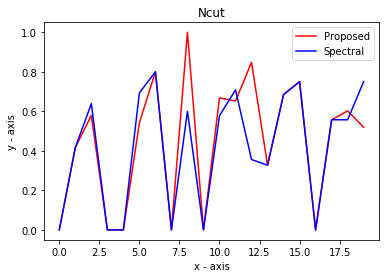

In [8]:
y_P = np.fmin(y_SLP, y_RwP, y_UnP)
y_S = np.fmin(y_SLS, y_UnS, y_RwS)

x = range(0,graph_number) 
plt.plot(x, y_P, color ='r', label ='Proposed') 
plt.plot(x, y_S, color ='b', label ='Spectral') 

plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.title("Ncut")
plt.legend(loc='upper right')
plt.rcParams["figure.figsize"] = [20,9]
plt.show() 

In [9]:
y_RwP

array([0.        , 0.41666667, 0.57934858, 0.        , 0.        ,
       0.92307692, 0.8       , 0.        , 1.        , 0.        ,
       0.97826087, 0.65213601, 0.84774536, 0.36363636, 0.68580804,
       0.75      , 0.        , 0.55727554, 0.9       , 1.06666667])

In [10]:
AM = graphs[0]
print(AM)

[[0. 1. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 0. 1. 0.]]


In [11]:
def show_graph_with_labels(adjacency_matrix):
    G = nx.from_numpy_matrix(adjacency_matrix) 
    nx.draw(G, with_labels=True)

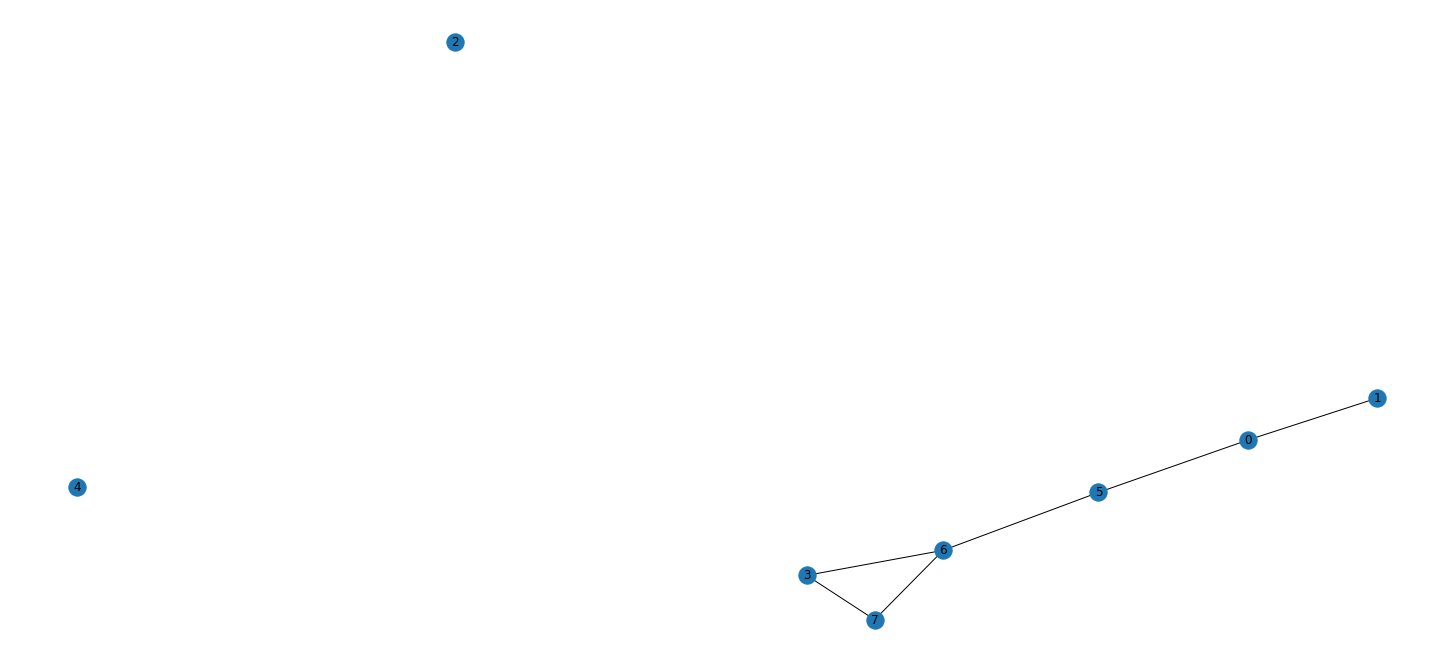

In [12]:
show_graph_with_labels(AM)

In [13]:
Results_ncut_hypothesis

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19
SLUP,0.000000,0.416667,1.027027,0.000000,0,0.541667,0.659341,0.000000,0.600000,0,0.540865,0.598742,1.021739,0.327543,0.582375,0.750000,0,0.696774,0.562500,0.519481
SLP,0.000000,0.416667,0.950000,0.000000,0,0.541667,0.800000,0.000000,1.000000,0,0.667986,0.661362,0.847745,0.327543,0.684685,0.750000,0,0.780186,0.602007,0.519481
SLS,0.342857,0.416667,0.638655,0.833333,0,0.693333,0.800000,0.444444,0.600000,0,0.577778,0.708333,0.356061,0.327543,0.684685,0.750000,0,0.557276,0.557276,0.750469
UnUP,0.000000,0.416667,0.642254,0.000000,0,1.019608,0.800000,0.000000,1.043478,0,1.011236,0.598742,1.010753,0.327543,1.041096,1.066667,0,1.028571,1.028571,1.012658
UnP,0.000000,0.416667,0.950000,0.000000,0,0.923077,0.833333,0.000000,0.600000,0,0.978261,0.643939,1.063830,0.327543,0.685808,0.906883,0,0.696774,0.900000,1.066667
UnS,0.000000,0.416667,0.684685,0.000000,0,0.693333,0.833333,0.000000,0.600000,0,0.588235,0.708333,0.356061,0.327543,0.684685,0.750000,0,0.675000,0.666667,0.750469
RwUP,0.000000,0.416667,0.639731,0.000000,0,1.019608,0.659341,0.000000,0.600000,0,1.011236,1.152542,1.021739,0.419048,0.989583,0.750000,0,0.557276,1.028571,1.012658
RwP,0.000000,0.416667,0.579349,0.000000,0,0.923077,0.800000,0.000000,1.000000,0,0.978261,0.652136,0.847745,0.363636,0.685808,0.750000,0,0.557276,0.900000,1.066667
RwS,0.342857,0.416667,0.579349,0.833333,0,0.693333,0.800000,0.444444,1.000000,0,0.577778,0.705882,0.460784,0.327543,0.684685,0.750000,0,0.557276,0.557276,0.750469


In [14]:
from RAH import get_fielder
from RAH import get_symmetric_laplacian

In [15]:
n = np.size(AM, axis = 1)
get_fielder(get_symmetric_laplacian(AM), n)

array([[-0.56848, -0.5    ,  0.     ,  0.38772,  0.     , -0.20696,
         0.28868,  0.38772]])